In [1]:
%%capture
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(800_000_000_000)
import shared_utils

from calitp_data_analysis.tables import tbls
import calitp_data_analysis.magics

from siuba import *
import pandas as pd
import geopandas as gpd

import datetime as dt

import importlib
from rt_analysis import rt_filter_map_plot
import build_speedmaps_index

from IPython.display import display, Markdown, Latex, HTML, IFrame
import json
import base64

In [2]:
## parameters cell
itp_id = 300

In [3]:
analysis_date = build_speedmaps_index.ANALYSIS_DATE

In [4]:
%%capture_parameters
human_date = analysis_date.strftime('%B %d %Y (%A)')
human_date

{"human_date": "May 17 2023 (Wednesday)"}


In [5]:
%%capture
rt_day = rt_filter_map_plot.from_gcs(itp_id, analysis_date)

In [6]:
%%capture_parameters
organization_name = rt_day.organization_name
organization_name

{"organization_name": "City of Santa Monica"}


# {organization_name}

## About These Maps:

* Each map shows bus (and rail, if applicable) speeds for {organization_name}, with a map each for the morning peak, midday, and afternoon peak periods on {human_date}.
* On the map, routes are split into segments corresponding to the distance between two stops, allowing you to focus on specific portions of the route experiencing a slowdown.
* Route segments are arrow-shaped to indicate direction of travel. Thicker segments indicate more frequent transit routes.
* State Highway Network routes are outlined in gray.
* Hover over, a segment with your mouse to see the exact speed, route name, and transit service frequency in that segment. 
    * Higher-frequency routes (3+ trips per hour) are especially important, since those slowdowns correspond to more vehicles, and riders, delayed in traffic.

## Morning Peak

In [7]:
%%capture
rt_day.set_filter(start_time='06:00', end_time='09:00')

### 20th Percentile Speeds by Segment

In [8]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [9]:
%%capture
rt_day.map_gz_export()

In [10]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmVoaWNsZSBTcGVlZHMgTWF5IDE3LCAyMDIzIChXZWQpIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8zMDBfQU1fUGVha19zcGVlZHMuZ2VvanNvbi5neiIsICJ0eXBlIjogInNwZWVkbWFwIiwgInByb3BlcnRpZXMiOiB7InN0cm9rZWQiOiBmYWxzZSwgImhpZ2hsaWdodF9zYXR1cmF0aW9uX211bHRpcGxpZXIiOiAwLjUsICJ0b29sdGlwX3NwZWVkX2tleSI6ICJwMjBfbXBoIn19XSwgImxhdF9sb24iOiBbMzQuMDI3MDgzNTc3MDE5MzQsIC0xMTguNDUwMTM5NjA0MDU3MV0sICJ6b29tIjogMTMsICJsZWdlbmRfdXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9jYWxpdHAtbWFwLXRpbGVzL3NwZWVkc19sZWdlbmQuc3ZnIn0=" target="_blank">Open Full Map in New Tab</a>

In [11]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [12]:
rt_day.map_variance(no_render=True)

In [13]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [14]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmFyaWF0aW9uIGluIFNwZWVkcyBNYXkgMTcsIDIwMjMgKFdlZCkiLCAidXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9jYWxpdHAtbWFwLXRpbGVzL3NwZWVkc18yMDIzLTA1LTE3LzMwMF9BTV9QZWFrX3ZhcmlhbmNlLmdlb2pzb24uZ3oiLCAidHlwZSI6ICJzcGVlZF92YXJpYXRpb24iLCAicHJvcGVydGllcyI6IHsic3Ryb2tlZCI6IGZhbHNlLCAiaGlnaGxpZ2h0X3NhdHVyYXRpb25fbXVsdGlwbGllciI6IDAuNX19XSwgImxhdF9sb24iOiBbMzQuMDI3MDgzNTc3MDE5MzQsIC0xMTguNDUwMTM5NjA0MDU3MV0sICJ6b29tIjogMTMsICJsZWdlbmRfdXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9jYWxpdHAtbWFwLXRpbGVzL3ZhcmlhbmNlX2xlZ2VuZC5zdmcifQ==" target="_blank">Open Full Map in New Tab</a>

In [15]:
rt_day.display_spa_map()

## Midday

In [16]:
%%capture
rt_day.set_filter(start_time='10:00', end_time='14:00')

### 20th Percentile Speeds by Segment

In [17]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [18]:
%%capture
rt_day.map_gz_export()

In [19]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmVoaWNsZSBTcGVlZHMgTWF5IDE3LCAyMDIzIChXZWQpIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8zMDBfTWlkZGF5X3NwZWVkcy5nZW9qc29uLmd6IiwgInR5cGUiOiAic3BlZWRtYXAiLCAicHJvcGVydGllcyI6IHsic3Ryb2tlZCI6IGZhbHNlLCAiaGlnaGxpZ2h0X3NhdHVyYXRpb25fbXVsdGlwbGllciI6IDAuNSwgInRvb2x0aXBfc3BlZWRfa2V5IjogInAyMF9tcGgifX1dLCAibGF0X2xvbiI6IFszNC4wMjY3NjIwMDc3MTE3MSwgLTExOC40NTA2NDQ4MjQ2NzU3XSwgInpvb20iOiAxMywgImxlZ2VuZF91cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvc3BlZWRzX2xlZ2VuZC5zdmcifQ==" target="_blank">Open Full Map in New Tab</a>

In [20]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [21]:
rt_day.map_variance(no_render=True)

In [22]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [23]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmFyaWF0aW9uIGluIFNwZWVkcyBNYXkgMTcsIDIwMjMgKFdlZCkiLCAidXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9jYWxpdHAtbWFwLXRpbGVzL3NwZWVkc18yMDIzLTA1LTE3LzMwMF9NaWRkYXlfdmFyaWFuY2UuZ2VvanNvbi5neiIsICJ0eXBlIjogInNwZWVkX3ZhcmlhdGlvbiIsICJwcm9wZXJ0aWVzIjogeyJzdHJva2VkIjogZmFsc2UsICJoaWdobGlnaHRfc2F0dXJhdGlvbl9tdWx0aXBsaWVyIjogMC41fX1dLCAibGF0X2xvbiI6IFszNC4wMjY3NjIwMDc3MTE3MSwgLTExOC40NTA2NDQ4MjQ2NzU3XSwgInpvb20iOiAxMywgImxlZ2VuZF91cmwiOiAiaHR0cHM6Ly9zdG9yYWdlLmdvb2dsZWFwaXMuY29tL2NhbGl0cC1tYXAtdGlsZXMvdmFyaWFuY2VfbGVnZW5kLnN2ZyJ9" target="_blank">Open Full Map in New Tab</a>

In [24]:
rt_day.display_spa_map()

## Afternoon Peak

In [25]:
%%capture
rt_day.set_filter(start_time='15:00', end_time='19:00')

### 20th Percentile Speeds by Segment

In [26]:
%%capture
_m = rt_day.segment_speed_map(how='low_speeds', no_title=True, shn=True,
                             no_render=True
                            )

In [27]:
%%capture
rt_day.map_gz_export()

In [28]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmVoaWNsZSBTcGVlZHMgTWF5IDE3LCAyMDIzIChXZWQpIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8zMDBfUE1fUGVha19zcGVlZHMuZ2VvanNvbi5neiIsICJ0eXBlIjogInNwZWVkbWFwIiwgInByb3BlcnRpZXMiOiB7InN0cm9rZWQiOiBmYWxzZSwgImhpZ2hsaWdodF9zYXR1cmF0aW9uX211bHRpcGxpZXIiOiAwLjUsICJ0b29sdGlwX3NwZWVkX2tleSI6ICJwMjBfbXBoIn19XSwgImxhdF9sb24iOiBbMzQuMDI1NTM0Njc2NTk3NzUsIC0xMTguNDQ2MzAyNzQ3MjQ3NjRdLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfbGVnZW5kLnN2ZyJ9" target="_blank">Open Full Map in New Tab</a>

In [29]:
rt_day.display_spa_map()

### Variation in Speeds by Segment

* This visualization shows variation as the ratio between the 80th percentile and 20th percentile speeds in each segment
* Segments with high variation in speeds make it difficult for transit operators to set accurate schedules, and can cause inconsistent service for riders

In [30]:
rt_day.map_variance(no_render=True)

In [31]:
%%capture
rt_day.map_gz_export(map_type = 'variance')

In [32]:
rt_day.render_spa_link()

<a href="https://leaflet-speedmaps--cal-itp-data-analyses.netlify.app/?state=eyJuYW1lIjogIm51bGwiLCAibGF5ZXJzIjogW3sibmFtZSI6ICJEMDcgU3RhdGUgSGlnaHdheSBOZXR3b3JrIiwgInVybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy9zcGVlZHNfMjAyMy0wNS0xNy8wN19TSE4uZ2VvanNvbi5neiIsICJ0eXBlIjogInN0YXRlX2hpZ2h3YXlfbmV0d29yayJ9LCB7Im5hbWUiOiAiQ2l0eSBvZiBTYW50YSBNb25pY2EgVmFyaWF0aW9uIGluIFNwZWVkcyBNYXkgMTcsIDIwMjMgKFdlZCkiLCAidXJsIjogImh0dHBzOi8vc3RvcmFnZS5nb29nbGVhcGlzLmNvbS9jYWxpdHAtbWFwLXRpbGVzL3NwZWVkc18yMDIzLTA1LTE3LzMwMF9QTV9QZWFrX3ZhcmlhbmNlLmdlb2pzb24uZ3oiLCAidHlwZSI6ICJzcGVlZF92YXJpYXRpb24iLCAicHJvcGVydGllcyI6IHsic3Ryb2tlZCI6IGZhbHNlLCAiaGlnaGxpZ2h0X3NhdHVyYXRpb25fbXVsdGlwbGllciI6IDAuNX19XSwgImxhdF9sb24iOiBbMzQuMDI1NTM0Njc2NTk3NzUsIC0xMTguNDQ2MzAyNzQ3MjQ3NjRdLCAiem9vbSI6IDEzLCAibGVnZW5kX3VybCI6ICJodHRwczovL3N0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vY2FsaXRwLW1hcC10aWxlcy92YXJpYW5jZV9sZWdlbmQuc3ZnIn0=" target="_blank">Open Full Map in New Tab</a>

In [33]:
rt_day.display_spa_map()

## Daily Speed Patterns

* This chart shows the distribution of median trip speeds throughout the day. It can help find times of day where transit riders experience the slowest overall speeds.

Median Trip Speed by Hour of Day, All Route Types, All Routes, 06:00–22:00, May 17, 2023 (Wed)

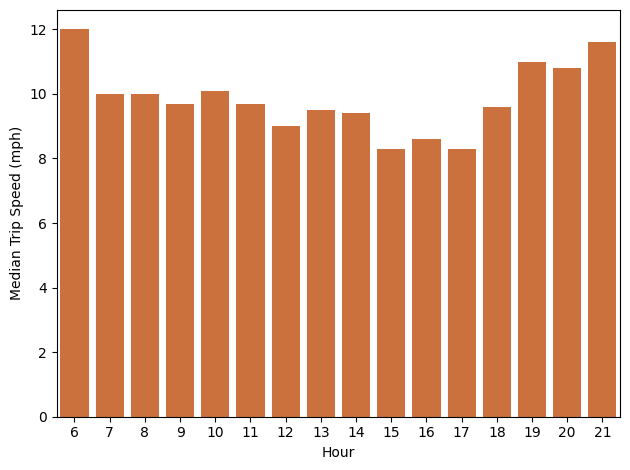

In [34]:
try:
    rt_day.set_filter(start_time='06:00', end_time='22:00')
    display(Markdown(f'Median Trip Speed by Hour of Day{rt_day.filter_formatted}'))

    rt_day.chart_speeds(no_title=True);
except:
    display(Markdown(f'Chart not available for this agency'))
    pass